<a href="https://colab.research.google.com/github/nived02/ML/blob/main/EE769_Assignment_1_Exploratory_and_Descriptive_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Check out the City of Los Angeles public data sources and test the hypothesis that the statistics of affordable housing projects” (government housing for low-income people) in a ZIP code has a relation to the health inspection scores of the restaurants in that ZIP code.

In [7]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns  # Import seaborn for making statistical graphics with enhanced visualizations


In [8]:
# Load datasets
inspection_data = pd.read_csv('restaurant_and_market_health_inspections.csv')
housing_data = pd.read_csv('hcidla_affordable_housing_projects.csv')


# **INSPECTION DATA EDA**

In [9]:
# Check Data Types
print(inspection_data.dtypes)


serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object


In [10]:
inspection_data['facility_zip'] = inspection_data['facility_zip'].astype(str)  # Ensure it's a string
inspection_data['facility_zip'] = inspection_data['facility_zip'].str.replace('-', '', regex=False)  # Remove hyphens
inspection_data['facility_zip'] = inspection_data['facility_zip'].str[:5]  # Keep only the first 5 digits

In [11]:
inspection_data['activity_date'] = pd.to_datetime(inspection_data['activity_date'])
inspection_data['facility_zip'] = inspection_data['facility_zip'].astype(int)

<ipython-input-11-1132d4777e8e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inspection_data['activity_date'] = pd.to_datetime(inspection_data['activity_date'])


In [12]:
print(inspection_data.dtypes)

serial_number                  object
activity_date          datetime64[ns]
facility_name                  object
score                           int64
grade                          object
service_code                    int64
service_description            object
employee_id                    object
facility_address               object
facility_city                  object
facility_id                    object
facility_state                 object
facility_zip                    int64
owner_id                       object
owner_name                     object
pe_description                 object
program_element_pe              int64
program_name                   object
program_status                 object
record_id                      object
dtype: object


In [13]:
print(inspection_data['facility_zip'].nunique())
print(inspection_data['facility_name'].nunique())
print(inspection_data['grade'].unique())



99
12071
['A' 'B' 'C' ' ' nan]


In [14]:
inspection_data['grade'].replace(' ', 'Ungraded', inplace=True)
inspection_data['grade'].fillna('Ungraded', inplace=True)
print(inspection_data['grade'].unique())

['A' 'B' 'C' 'Ungraded']


<ipython-input-15-b9c6810122fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=inspection_data, palette='pastel', order=['A', 'B', 'C', 'Ungraded'])


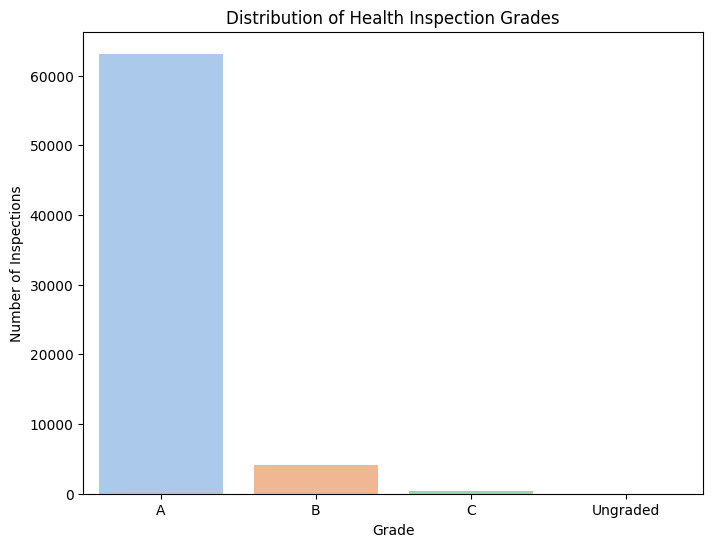

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', data=inspection_data, palette='pastel', order=['A', 'B', 'C', 'Ungraded'])
plt.title('Distribution of Health Inspection Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Inspections')
plt.show()


In [16]:
print(inspection_data['score'].unique())

[ 95  92  93  94  91  97  90  98  85  82  96 100  84  86  99  80  83  81
  78  73  87  72  77  88  76  74  75  89  70  71  79  65  64  68  67  66]


In [17]:
zip_code_counts = inspection_data['facility_zip'].value_counts()
print(zip_code_counts.head(10))  # Display the top 10 ZIP codes with the most inspections


facility_zip
90012    2822
90028    2651
90045    2645
90015    2190
90036    2133
90006    2113
90027    1931
90020    1853
90025    1829
90005    1656
Name: count, dtype: int64


<ipython-input-18-24eb68eb5735>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_code_counts.index[:20], y=zip_code_counts.values[:20], palette='viridis')


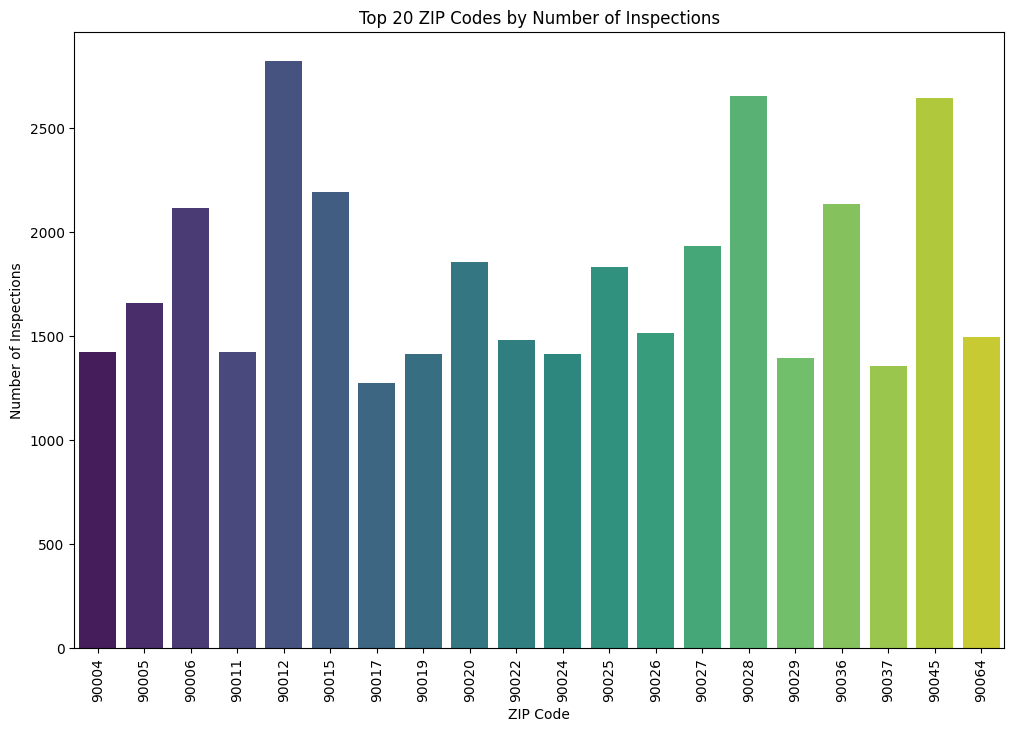

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=zip_code_counts.index[:20], y=zip_code_counts.values[:20], palette='viridis')
plt.title('Top 20 ZIP Codes by Number of Inspections')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=90)
plt.show()


facility_zip
90053    100.000000
91307     99.000000
90222     98.500000
90201     98.000000
90220     98.000000
91326     98.000000
91505     97.250000
90089     96.903780
92880     96.500000
90095     96.133333
91340     96.000000
91602     95.666667
91401     95.500000
91006     95.500000
90054     95.173913
91325     95.125000
91601     95.000000
90049     94.968162
90059     94.810888
90007     94.804917
90002     94.649057
90071     94.588580
90056     94.532258
90013     94.505958
91367     94.428571
90062     94.322581
90037     94.289513
90014     94.218085
90232     94.214286
90079     94.208333
Name: score, dtype: float64


<ipython-input-19-0dc8d986dcab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores_by_zip.index[:20], y=avg_scores_by_zip.values[:20], palette='viridis')


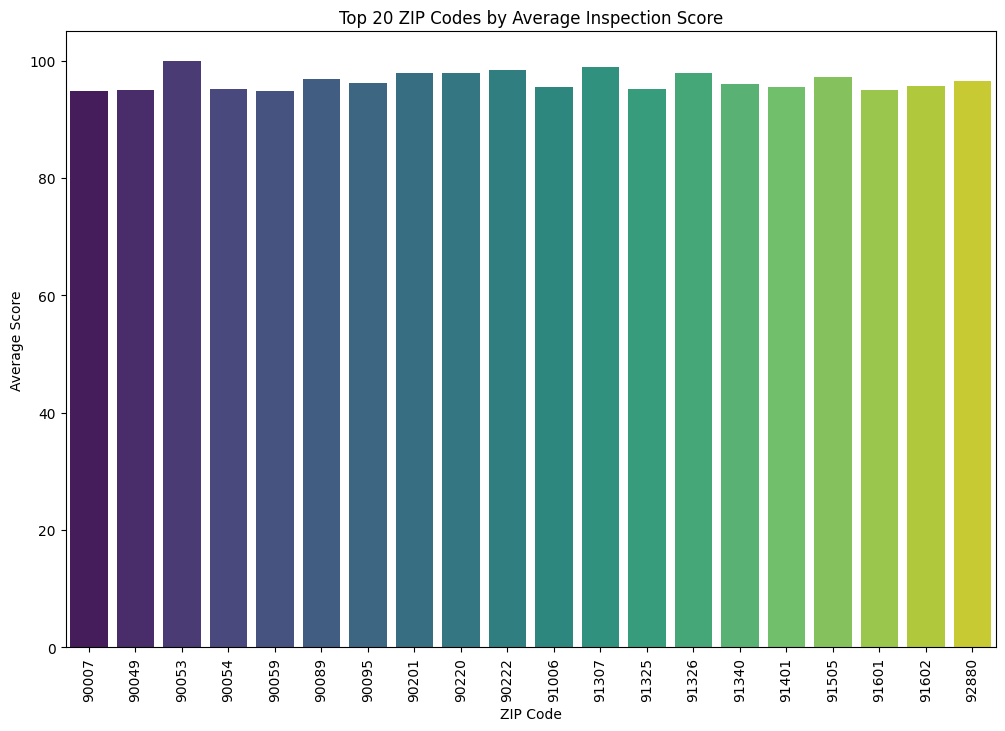

In [19]:
avg_scores_by_zip = inspection_data.groupby('facility_zip')['score'].mean().sort_values(ascending=False)
print(avg_scores_by_zip.head(30))  # Display the top 10 ZIP codes with the highest average scores

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_scores_by_zip.index[:20], y=avg_scores_by_zip.values[:20], palette='viridis')
plt.title('Top 20 ZIP Codes by Average Inspection Score')
plt.xlabel('ZIP Code')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()


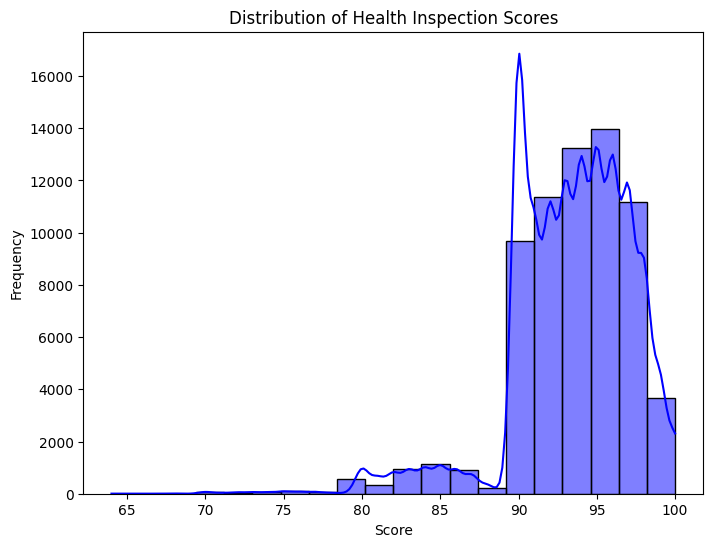

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(inspection_data['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Health Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [21]:
print(inspection_data.isnull().sum())


serial_number           0
activity_date           0
facility_name           0
score                   0
grade                   0
service_code            0
service_description     0
employee_id             0
facility_address        0
facility_city           0
facility_id             0
facility_state          0
facility_zip            0
owner_id                0
owner_name              0
pe_description          0
program_element_pe      0
program_name           29
program_status          0
record_id               0
dtype: int64


In [22]:
inspection_data.dropna(subset=['pe_description', 'program_element_pe','program_name','program_status','record_id' ], inplace=True)

In [23]:
print(inspection_data.isnull().sum())


serial_number          0
activity_date          0
facility_name          0
score                  0
grade                  0
service_code           0
service_description    0
employee_id            0
facility_address       0
facility_city          0
facility_id            0
facility_state         0
facility_zip           0
owner_id               0
owner_name             0
pe_description         0
program_element_pe     0
program_name           0
program_status         0
record_id              0
dtype: int64


In [24]:
# Create a DataFrame to compare the two columns
comparison_df = inspection_data[['program_name', 'facility_name']].drop_duplicates()
comparison_df['match'] = comparison_df['program_name'].str.strip().str.lower() == comparison_df['facility_name'].str.strip().str.lower()

# Display rows where there is a mismatch
mismatches = comparison_df[~comparison_df['match']]
print(f"Number of mismatches: {len(mismatches)}")
print(mismatches.head(10))


Number of mismatches: 1903
                             program_name                   facility_name  \
18                       7- ELEVEN #27069                 7 ELEVEN #27069   
48                                 LAXSUL                  LAXSUL COMPANY   
58                RALPHS MARKET DELI #206              RALPHS MARKET #206   
64                            KIKKA SUSHI              KIKKA @ ARCO PLAZA   
78              RENAISSANCE EMPLOYEE CAFE  RENAISSANCE 96TH STREET BISTRO   
90                        JACK IN THE BOX           JACK IN THE BOX # 335   
94                    RENAISSANCE BANQUET  RENAISSANCE 96TH STREET BISTRO   
96   QANTAS AIRWAYS BUSINESS CLASS LOUNGE           QANTAS AIRWAYS LOUNGE   
99        QANTAS AIRWAYS 1ST CLASS LOUNGE           QANTAS AIRWAYS LOUNGE   
110                 MCDONALD'S RESTAURANT              MCDONALD'S # 10129   

     match  
18   False  
48   False  
58   False  
64   False  
78   False  
90   False  
94   False  
96   False  
99   Fal

# **Housing data EDA**

In [25]:
print(housing_data.dtypes)

APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
IN-SERVICE DATE             object
DEVELOPER                   object
MANAGEMENT COMPANY          object
CONTACT PHONE               object
PHOTO                       object
JOBS                       float64
PROJECT SUMMARY URL         object
CONTRACT NUMBERS            object
DATE STAMP                  object
SITE LONGITUDE      

In [26]:
housing_data['DATE FUNDED'] = pd.to_datetime(housing_data['DATE FUNDED'], errors='coerce')
housing_data['IN-SERVICE DATE'] = pd.to_datetime(housing_data['IN-SERVICE DATE'], errors='coerce')


In [27]:
print(housing_data.dtypes)

APN                                 int64
PROJECT NUMBER                     object
NAME                               object
DEVELOPMENT STAGE                  object
CONSTRUCTION TYPE                  object
SITE ADDRESS                       object
SITE  COUNCIL DISTRICT              int64
SITE #                              int64
SITE COMMUNITY                     object
SITE UNITS                          int64
PROJECT TOTAL UNITS                 int64
HOUSING TYPE                       object
SUPPORTIVE HOUSING                 object
SH UNITS PER SITE                   int64
DATE FUNDED                datetime64[ns]
LAHD FUNDED                       float64
LEVERAGE                          float64
TAX EXEMPT CONDUIT BOND             int64
TDC                               float64
IN-SERVICE DATE            datetime64[ns]
DEVELOPER                          object
MANAGEMENT COMPANY                 object
CONTACT PHONE                      object
PHOTO                             

In [28]:
print(housing_data.isnull().sum())

APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE            0
DATE FUNDED                  1
LAHD FUNDED                  0
LEVERAGE                     0
TAX EXEMPT CONDUIT BOND      0
TDC                          0
IN-SERVICE DATE             58
DEVELOPER                   26
MANAGEMENT COMPANY          55
CONTACT PHONE               84
PHOTO                        0
JOBS                       180
PROJECT SUMMARY URL          0
CONTRACT NUMBERS           148
DATE STAMP                   0
SITE LONGITUDE               0
SITE LATITUDE                0
GPS_COORDS ON MAP            0
dtype: int64


In [29]:
housing_data.dropna(subset=['DEVELOPMENT STAGE', 'DATE FUNDED'], inplace=True)
housing_data['CONSTRUCTION TYPE'].fillna('Unknown', inplace=True)
housing_data['SITE COMMUNITY'].fillna('Unknown', inplace=True)
housing_data['HOUSING TYPE'].fillna('Unknown', inplace=True)
housing_data['IN-SERVICE DATE'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Example date
housing_data['DEVELOPER'].fillna('Unknown', inplace=True)
housing_data['MANAGEMENT COMPANY'].fillna('Unknown', inplace=True)
housing_data['JOBS'].fillna('Unknown', inplace=True)
housing_data.drop(columns=['CONTACT PHONE', 'CONTRACT NUMBERS'], inplace=True)

<ipython-input-29-337bf1b390f6>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  housing_data['JOBS'].fillna('Unknown', inplace=True)


In [30]:
print(housing_data.isnull().sum())


APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
dtype: int64


In [31]:
import re

# Function to extract ZIP code from an address
def extract_zip_code(address):
    match = re.search(r'\b\d{5}\b', address)
    return match.group(0) if match else None

# Apply the function to the SITE ADDRESS column
housing_data['ZIP_CODE'] = housing_data['SITE ADDRESS'].apply(extract_zip_code)

housing_data.to_csv('housing_data.csv', index=False)

# Check the first few rows to verify
print(housing_data[['SITE ADDRESS', 'ZIP_CODE']].head())


                                        SITE ADDRESS ZIP_CODE
0               1221 W 7TH ST  Los Angeles, CA 90017    90017
1            2809 S WEST BLVD  Los Angeles, CA 90016    90016
2  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...    90011
3        7305 S CRENSHAW BLVD  Los Angeles, CA 90043    90043
4             116 S WITMER ST  Los Angeles, CA 90026    90026


In [32]:
print(housing_data.isnull().sum())


APN                        0
PROJECT NUMBER             0
NAME                       0
DEVELOPMENT STAGE          0
CONSTRUCTION TYPE          0
SITE ADDRESS               0
SITE  COUNCIL DISTRICT     0
SITE #                     0
SITE COMMUNITY             0
SITE UNITS                 0
PROJECT TOTAL UNITS        0
HOUSING TYPE               0
SUPPORTIVE HOUSING         0
SH UNITS PER SITE          0
DATE FUNDED                0
LAHD FUNDED                0
LEVERAGE                   0
TAX EXEMPT CONDUIT BOND    0
TDC                        0
IN-SERVICE DATE            0
DEVELOPER                  0
MANAGEMENT COMPANY         0
PHOTO                      0
JOBS                       0
PROJECT SUMMARY URL        0
DATE STAMP                 0
SITE LONGITUDE             0
SITE LATITUDE              0
GPS_COORDS ON MAP          0
ZIP_CODE                   0
dtype: int64


In [33]:
print(housing_data['ZIP_CODE'].isnull().sum())
print(housing_data['ZIP_CODE'].unique())


0
['90017' '90016' '90011' '90043' '90026' '90015' '90037' '90041' '90013'
 '90057' '90003' '90028' '90019' '90744' '10150' '90006' '14630' '90018'
 '90020' '11001' '12059' '90027' '90035' '91352' '90004' '91343' '90007'
 '90008' '13230' '90029' '90038' '90045' '90021' '15320' '13604' '90014'
 '90062' '90059' '90044' '90033' '90731' '19455' '91402' '91335' '90031'
 '12010' '14801' '90247' '91403' '91601' '90002' '11800' '14653' '15532'
 '90065' '13044' '90023' '10634' '91405' '91042' '11976' '90068' '20116'
 '14419' '13457' '90039' '11050' '90032' '90047' '16304' '20205' '10991'
 '12667' '90291' '14731' '10510' '90005' '16015' '11408' '13368' '91303'
 '91605' '90732' '90042' '10311' '10915' '90248' '90061' '18602' '19325'
 '11735' '12230' '11950' '15211' '10424' '90292' '10607' '13751' '11301'
 '10803' '12003' '90710' '90012' '91040' '90063' '15455' '91331' '12129'
 '12831' '91606' '10006' '10966' '11604' '14536' '10345' '90064' '21300'
 '20750' '15305' '11010' '14649' '14650' '13574' 

<ipython-input-34-fab3e92e1c7f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_code_projects.index[:20], y=zip_code_projects.values[:20], palette='viridis')


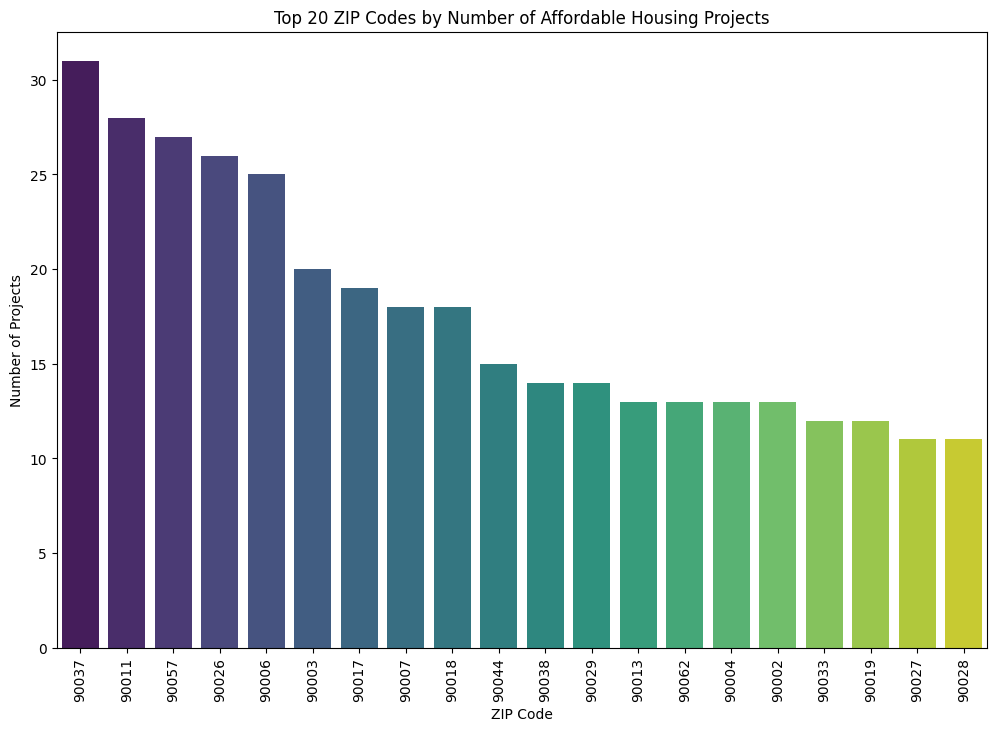

In [34]:
zip_code_projects = housing_data['ZIP_CODE'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=zip_code_projects.index[:20], y=zip_code_projects.values[:20], palette='viridis')
plt.title('Top 20 ZIP Codes by Number of Affordable Housing Projects')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90)
plt.show()


<ipython-input-35-3ccdd5be1818>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUSING TYPE', data=housing_data, palette='pastel')


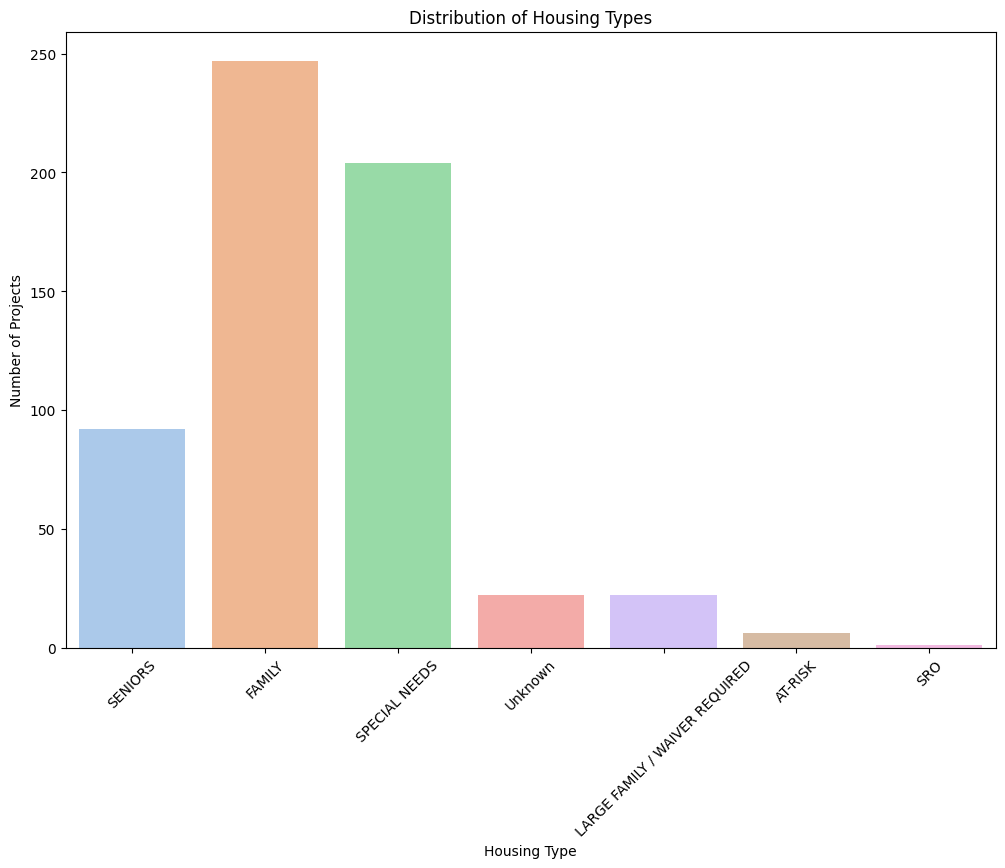

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='HOUSING TYPE', data=housing_data, palette='pastel')
plt.title('Distribution of Housing Types')
plt.xlabel('Housing Type')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.show()


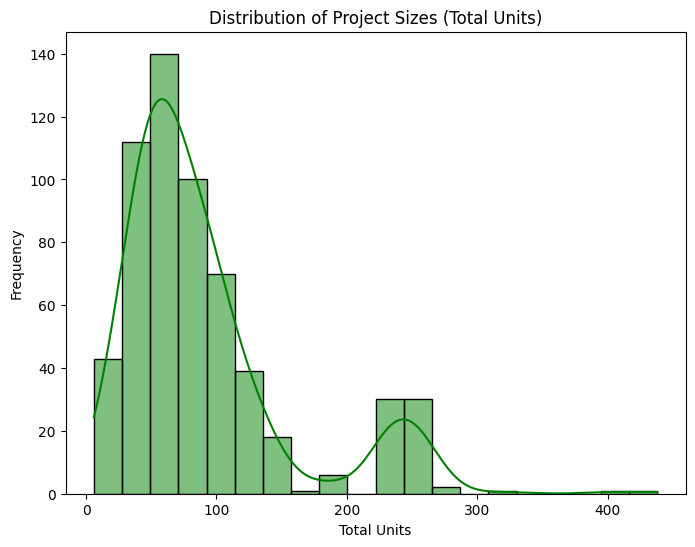

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['PROJECT TOTAL UNITS'], bins=20, kde=True, color='green')
plt.title('Distribution of Project Sizes (Total Units)')
plt.xlabel('Total Units')
plt.ylabel('Frequency')
plt.show()


In [37]:
print(housing_data.columns)

Index(['APN', 'PROJECT NUMBER', 'NAME', 'DEVELOPMENT STAGE',
       'CONSTRUCTION TYPE', 'SITE ADDRESS', 'SITE  COUNCIL DISTRICT', 'SITE #',
       'SITE COMMUNITY', 'SITE UNITS', 'PROJECT TOTAL UNITS', 'HOUSING TYPE',
       'SUPPORTIVE HOUSING', 'SH UNITS PER SITE', 'DATE FUNDED', 'LAHD FUNDED',
       'LEVERAGE', 'TAX EXEMPT CONDUIT BOND', 'TDC', 'IN-SERVICE DATE',
       'DEVELOPER', 'MANAGEMENT COMPANY', 'PHOTO', 'JOBS',
       'PROJECT SUMMARY URL', 'DATE STAMP', 'SITE LONGITUDE', 'SITE LATITUDE',
       'GPS_COORDS ON MAP', 'ZIP_CODE'],
      dtype='object')


In [38]:
print(housing_data['SITE ADDRESS'].isnull().sum())
print(inspection_data['facility_zip'].isnull().sum())


0
0


# c) Summarize each file by ZIP code using SQL: [2]
# i. Ensure the right type of summarization (sum, mean, max etc.) for the other variables **bold text**

In [39]:
import sqlite3
import pandas as pd

In [40]:
conn = sqlite3.connect('data_summary.db')

In [41]:
# Load inspection data into SQLite
#inspection_data = pd.read_csv('restaurant_and_market_health_inspections.csv')
inspection_data.to_sql('inspection_data', conn, if_exists='replace', index=False)

# Load housing data into SQLite
#housing_data = pd.read_csv('hcidla_affordable_housing_projects.csv')
housing_data.to_sql('housing_data', conn, if_exists='replace', index=False)

594

In [42]:
schema_query = "PRAGMA table_info(housing_data);"
schema = pd.read_sql_query(schema_query, conn)
print(schema)

    cid                     name       type  notnull dflt_value  pk
0     0                      APN    INTEGER        0       None   0
1     1           PROJECT NUMBER       TEXT        0       None   0
2     2                     NAME       TEXT        0       None   0
3     3        DEVELOPMENT STAGE       TEXT        0       None   0
4     4        CONSTRUCTION TYPE       TEXT        0       None   0
5     5             SITE ADDRESS       TEXT        0       None   0
6     6   SITE  COUNCIL DISTRICT    INTEGER        0       None   0
7     7                   SITE #    INTEGER        0       None   0
8     8           SITE COMMUNITY       TEXT        0       None   0
9     9               SITE UNITS    INTEGER        0       None   0
10   10      PROJECT TOTAL UNITS    INTEGER        0       None   0
11   11             HOUSING TYPE       TEXT        0       None   0
12   12       SUPPORTIVE HOUSING       TEXT        0       None   0
13   13        SH UNITS PER SITE    INTEGER     

In [43]:
# Query for inspection data summary
inspection_query = """
SELECT
    facility_zip AS ZIP_CODE,
    COUNT(*) AS total_inspections,
    AVG(score) AS average_score,
    MAX(score) AS highest_score,
    MIN(score) AS lowest_score,
    COUNT(CASE WHEN grade = 'A' THEN 1 END) AS grade_A_count,
    COUNT(CASE WHEN grade = 'B' THEN 1 END) AS grade_B_count,
    COUNT(CASE WHEN grade = 'C' THEN 1 END) AS grade_C_count,
    COUNT(CASE WHEN grade = ' ' OR grade IS NULL THEN 1 END) AS ungraded_count
FROM
    inspection_data
GROUP BY
    facility_zip
ORDER BY
    total_inspections DESC;
"""

# Execute the query and fetch results
inspection_summary = pd.read_sql_query(inspection_query, conn)
print(inspection_summary.head())

   ZIP_CODE  total_inspections  average_score  highest_score  lowest_score  \
0     90012               2818      93.414478            100            73   
1     90028               2650      93.753208            100            70   
2     90045               2645      94.118336            100            71   
3     90015               2188      94.131627            100            70   
4     90036               2133      93.630567            100            72   

   grade_A_count  grade_B_count  grade_C_count  ungraded_count  
0           2610            202              6               0  
1           2531            113              6               0  
2           2484            150             11               0  
3           2052            126             10               0  
4           2061             70              2               0  


In [44]:
# Query for housing data summary
housing_query = """
SELECT
    ZIP_CODE,
    COUNT(*) AS total_projects,
    SUM(`SITE UNITS`) AS total_units,
    AVG(`SITE UNITS`) AS average_units_per_project,
    SUM(`LAHD FUNDED`) AS total_funding,
    AVG(`LAHD FUNDED`) AS average_funding_per_project,
    SUM(LEVERAGE) AS total_leverage,
    AVG(LEVERAGE) AS average_leverage_per_project,
    SUM(TDC) AS total_development_cost,
    AVG(TDC) AS average_development_cost_per_project,
    SUM(JOBS) AS total_jobs_created,
    AVG(JOBS) AS average_jobs_per_project
FROM
    housing_data
GROUP BY
    ZIP_CODE
ORDER BY
    total_projects DESC;
"""

# Execute the query and fetch results
housing_summary = pd.read_sql_query(housing_query, conn)
print(housing_summary.head())


  ZIP_CODE  total_projects  total_units  average_units_per_project  \
0    90037              31         1306                  42.129032   
1    90011              28         1007                  35.964286   
2    90057              27         1713                  63.444444   
3    90026              26         1453                  55.884615   
4    90006              25         1084                  43.360000   

   total_funding  average_funding_per_project  total_leverage  \
0   9.726077e+07                 3.137444e+06    3.789436e+08   
1   1.339928e+08                 4.785457e+06    4.830752e+08   
2   1.406567e+08                 5.209508e+06    4.701178e+08   
3   1.468631e+08                 5.648582e+06    3.561195e+08   
4   7.696415e+07                 3.078566e+06    4.165724e+08   

   average_leverage_per_project  total_development_cost  \
0                  1.222399e+07            5.341490e+08   
1                  1.725269e+07            6.827929e+08   
2          

# d) Join the files using SQL by ZIP code: [2]
# i. Ensure that the ZIP codes are in compatible formats and lengths
# ii. For each ZIP, get the predictor variable from the housing projects file, and potential predictedvariables from the health inspections file **bold text**

In [45]:
join_query = """
SELECT
    h.ZIP_CODE,
    h.total_projects,
    h.total_units,
    h.average_units_per_project,
    h.total_funding,
    h.average_funding_per_project,
    h.total_leverage,
    h.average_leverage_per_project,
    h.total_development_cost,
    h.average_development_cost_per_project,
    h.total_jobs_created,
    h.average_jobs_per_project,
    i.total_inspections,
    i.average_score,
    i.highest_score,
    i.lowest_score,
    i.grade_A_count,
    i.grade_B_count,
    i.grade_C_count,
    i.ungraded_count
FROM
    (SELECT
        ZIP_CODE,
        COUNT(*) AS total_projects,
        SUM(`SITE UNITS`) AS total_units,
        AVG(`SITE UNITS`) AS average_units_per_project,
        SUM(`LAHD FUNDED`) AS total_funding,
        AVG(`LAHD FUNDED`) AS average_funding_per_project,
        SUM(LEVERAGE) AS total_leverage,
        AVG(LEVERAGE) AS average_leverage_per_project,
        SUM(TDC) AS total_development_cost,
        AVG(TDC) AS average_development_cost_per_project,
        SUM(JOBS) AS total_jobs_created,
        AVG(JOBS) AS average_jobs_per_project
     FROM
        housing_data
     GROUP BY
        ZIP_CODE) h
LEFT JOIN
    (SELECT
        facility_zip AS ZIP_CODE,
        COUNT(*) AS total_inspections,
        AVG(score) AS average_score,
        MAX(score) AS highest_score,
        MIN(score) AS lowest_score,
        COUNT(CASE WHEN grade = 'A' THEN 1 END) AS grade_A_count,
        COUNT(CASE WHEN grade = 'B' THEN 1 END) AS grade_B_count,
        COUNT(CASE WHEN grade = 'C' THEN 1 END) AS grade_C_count,
        COUNT(CASE WHEN grade = ' ' OR grade IS NULL THEN 1 END) AS ungraded_count
     FROM
        inspection_data
     GROUP BY
        facility_zip) i
ON h.ZIP_CODE = i.ZIP_CODE
ORDER BY
    h.total_projects DESC;
"""

# Execute the query and fetch the results
joined_data = pd.read_sql_query(join_query, conn)
print(joined_data.head())


  ZIP_CODE  total_projects  total_units  average_units_per_project  \
0    90037              31         1306                  42.129032   
1    90011              28         1007                  35.964286   
2    90057              27         1713                  63.444444   
3    90026              26         1453                  55.884615   
4    90006              25         1084                  43.360000   

   total_funding  average_funding_per_project  total_leverage  \
0   9.726077e+07                 3.137444e+06    3.789436e+08   
1   1.339928e+08                 4.785457e+06    4.830752e+08   
2   1.406567e+08                 5.209508e+06    4.701178e+08   
3   1.468631e+08                 5.648582e+06    3.561195e+08   
4   7.696415e+07                 3.078566e+06    4.165724e+08   

   average_leverage_per_project  total_development_cost  \
0                  1.222399e+07            5.341490e+08   
1                  1.725269e+07            6.827929e+08   
2          

In [46]:
conn.close()


# e) Formulate and test the hypothesis: [2]
# i. Formulate a reasonable alternative hypothesis
#ii. Formulate a null hypothesis
#iii. Select an appropriate test and significance level
# iv. Perform the test and decide if the null hypothesis should be rejected and alternativehypothesis should be accepted **bold text**

In [47]:
print(joined_data.columns)

Index(['ZIP_CODE', 'total_projects', 'total_units',
       'average_units_per_project', 'total_funding',
       'average_funding_per_project', 'total_leverage',
       'average_leverage_per_project', 'total_development_cost',
       'average_development_cost_per_project', 'total_jobs_created',
       'average_jobs_per_project', 'total_inspections', 'average_score',
       'highest_score', 'lowest_score', 'grade_A_count', 'grade_B_count',
       'grade_C_count', 'ungraded_count'],
      dtype='object')


In [48]:
# prompt: show me the data types of joined_data

print(joined_data.dtypes)


ZIP_CODE                                 object
total_projects                            int64
total_units                               int64
average_units_per_project               float64
total_funding                           float64
average_funding_per_project             float64
total_leverage                          float64
average_leverage_per_project            float64
total_development_cost                  float64
average_development_cost_per_project    float64
total_jobs_created                      float64
average_jobs_per_project                float64
total_inspections                       float64
average_score                           float64
highest_score                           float64
lowest_score                            float64
grade_A_count                           float64
grade_B_count                           float64
grade_C_count                           float64
ungraded_count                          float64
dtype: object


In [49]:
# prompt: convert zip_code to integer

joined_data['ZIP_CODE'] = pd.to_numeric(joined_data['ZIP_CODE'], errors='coerce').fillna(0).astype(int)


In [50]:
print(joined_data.dtypes)

ZIP_CODE                                  int64
total_projects                            int64
total_units                               int64
average_units_per_project               float64
total_funding                           float64
average_funding_per_project             float64
total_leverage                          float64
average_leverage_per_project            float64
total_development_cost                  float64
average_development_cost_per_project    float64
total_jobs_created                      float64
average_jobs_per_project                float64
total_inspections                       float64
average_score                           float64
highest_score                           float64
lowest_score                            float64
grade_A_count                           float64
grade_B_count                           float64
grade_C_count                           float64
ungraded_count                          float64
dtype: object


In [51]:
# prompt: find missing values

print(joined_data.isnull().sum())


ZIP_CODE                                 0
total_projects                           0
total_units                              0
average_units_per_project                0
total_funding                            0
average_funding_per_project              0
total_leverage                           0
average_leverage_per_project             0
total_development_cost                   0
average_development_cost_per_project     0
total_jobs_created                       0
average_jobs_per_project                 0
total_inspections                       90
average_score                           90
highest_score                           90
lowest_score                            90
grade_A_count                           90
grade_B_count                           90
grade_C_count                           90
ungraded_count                          90
dtype: int64


In [52]:
print(len(joined_data))

139


In [53]:
# Identify ZIP codes present in one dataset but missing from the other
missing_in_inspection = joined_data[joined_data['total_inspections'].isnull()]['ZIP_CODE'].unique()
missing_in_housing = joined_data[joined_data['total_projects'].isnull()]['ZIP_CODE'].unique()

print("ZIP codes missing in inspection data:", missing_in_inspection)
print("ZIP codes missing in housing data:", missing_in_housing)


ZIP codes missing in inspection data: [90744 91402 91343 91335 90731 91352 11301 91303 90248 91405 91605 10006
 10150 10243 10311 10345 10424 10510 10607 10634 10648 10803 10915 10966
 10991 11001 11010 11050 11408 11604 11734 11735 11800 11950 11976 12003
 12010 12015 12059 12129 12230 12360 12381 12415 12667 12831 13044 13230
 13368 13457 13574 13604 13751 14045 14142 14419 14536 14630 14649 14650
 14653 14726 14731 14801 15211 15301 15305 15320 15455 15532 16015 16304
 18425 18602 19325 19455 20116 20205 20750 21121 21300 25820 90247 90710
 90732 91040 91042 91331 91403 91606]
ZIP codes missing in housing data: []


In [54]:
print(len(missing_in_inspection))

90


In [55]:
# Fill missing values with zeros
filled_data = joined_data.fillna(0)

# Proceed with correlation analysis
from scipy.stats import pearsonr

x = filled_data['total_units']
y = filled_data['average_score']

pearson_corr, pearson_p_value = pearsonr(x, y)
print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson P-Value:", pearson_p_value)


Pearson Correlation Coefficient: 0.553088262825474
Pearson P-Value: 1.6607107737658564e-12


# **2. Open-ended: Find some interesting data from Indian government data portal https://www.data.gov.inand perform EDA, derive some insights using graphs, and perform a statistical test for an interestinghypothesis. No need to use multiple files for this question, unless you want to do the extra work for yourown learning. [4]**

Selected the Physical & Financial Progress of Pradhan Mantri Gram Sadak Yojna (PMGSY) as on date Dataset for EDA

In [56]:
df = pd.read_csv('PMGSY.csv')

In [57]:
df.head()

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,14,5,3,1952.378,775.69920,1809.482,697.8523,24.34
1,Andhra Pradesh,Alluri Sitharama Raju,RCPLWEA,124,34,99,18,25,16,1084.885,827.64173,780.599,485.3758,283.61
2,Andhra Pradesh,Anakapalli,PMGSY-III,13,4,13,0,0,4,92.275,60.77811,86.604,46.0024,0.00
3,Andhra Pradesh,Anantapur,PMGSY-I,207,22,207,21,0,1,862.650,214.77720,854.249,213.8990,0.00
4,Andhra Pradesh,Annamayya,PMGSY-I,144,6,144,6,0,0,495.735,106.88910,479.780,101.3144,0.00


In [58]:
# Find the number of unique values in the 'STATE_NAME' column
num_unique_states = df['STATE_NAME'].nunique()

# Print the result
print(f"Number of unique states: {num_unique_states}")


Number of unique states: 32


In [59]:
print(df.dtypes)


STATE_NAME                            object
DISTRICT_NAME                         object
PMGSY_SCHEME                          object
NO_OF_ROAD_WORK_SANCTIONED             int64
NO_OF_BRIDGES_SANCTIONED               int64
NO_OF_ROAD_WORKS_COMPLETED             int64
NO_OF_BRIDGES_COMPLETED                int64
NO_OF_ROAD_WORKS_BALANCE               int64
NO_OF_BRIDGES_BALANCE                  int64
LENGTH_OF_ROAD_WORK_SANCTIONED_KM    float64
COST_OF_WORKS_SANCTIONED_LAKHS       float64
LENGTH_OF_ROAD_WORK_COMPLETED_KM     float64
EXPENDITURE_OCCURED_LAKHS            float64
LENGTH_OF_ROAD_WORK_BALANCE_KM       float64
dtype: object


In [60]:
# Group by state and sum the number of roads sanctioned
roads_sanctioned_by_state = df.groupby('STATE_NAME')['NO_OF_ROAD_WORK_SANCTIONED'].sum()

# Print the result
print(roads_sanctioned_by_state)


STATE_NAME
Andaman And Nicobar      102
Andhra Pradesh          5340
Arunachal Pradesh       1558
Assam                   9269
Bihar                  18773
Chhattisgarh            9327
Goa                       70
Gujarat                 4828
Haryana                  773
Himachal Pradesh        3877
Jammu And Kashmir       3437
Jharkhand               8192
Karnataka               4435
Kerala                  1811
Ladakh                   191
Madhya Pradesh         20601
Maharashtra             6930
Manipur                 1969
Meghalaya               1229
Mizoram                  368
Nagaland                 396
Odisha                 17937
Puducherry                45
Punjab                  1508
Rajasthan              18156
Sikkim                  1040
Tamil Nadu             10352
Telangana               3570
Tripura                 1545
Uttar Pradesh          21124
Uttarakhand             2620
West Bengal             7371
Name: NO_OF_ROAD_WORK_SANCTIONED, dtype: int64


<ipython-input-61-da8c0cd24b37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roads_sanctioned_by_state.index, y=roads_sanctioned_by_state.values, palette='viridis')


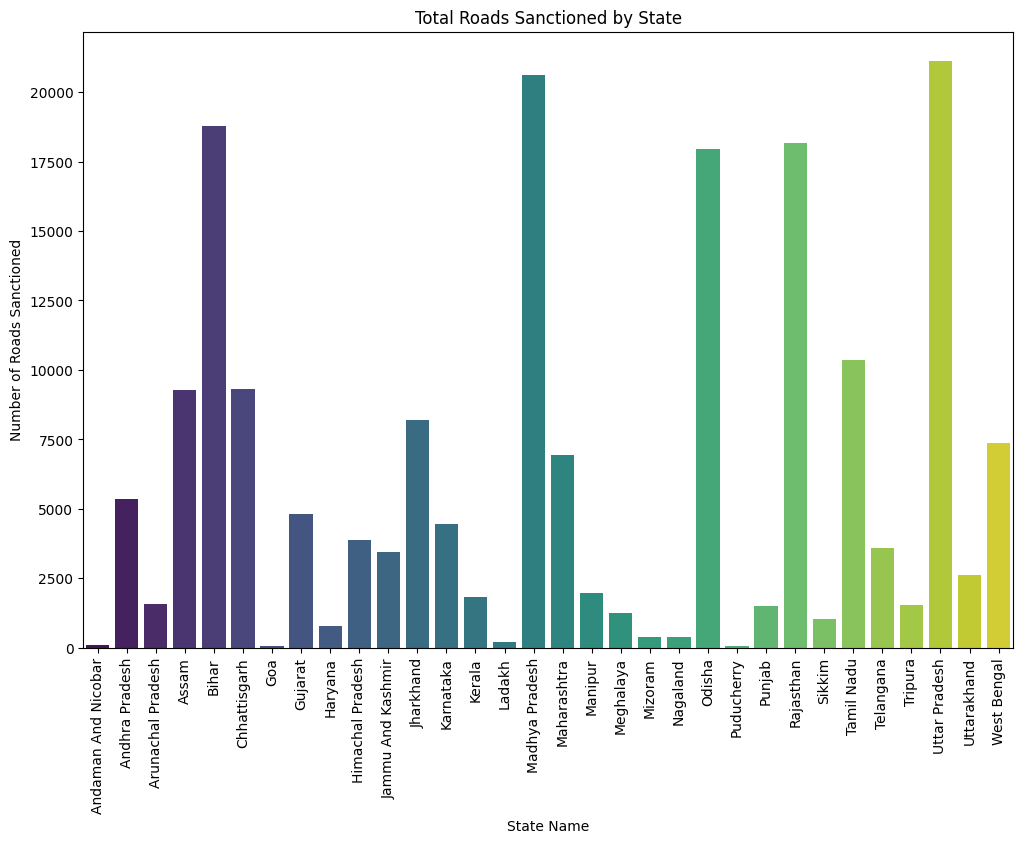

In [61]:

plt.figure(figsize=(12, 8))
sns.barplot(x=roads_sanctioned_by_state.index, y=roads_sanctioned_by_state.values, palette='viridis')
plt.title('Total Roads Sanctioned by State')
plt.xlabel('State Name')
plt.ylabel('Number of Roads Sanctioned')
plt.xticks(rotation=90)
plt.show()


In [62]:


# Group by state and sum the cost of works sanctioned
cost_sanctioned_by_state = df.groupby('STATE_NAME')['COST_OF_WORKS_SANCTIONED_LAKHS'].sum()

# Print the result
print(cost_sanctioned_by_state)


STATE_NAME
Andaman And Nicobar       82.78810
Andhra Pradesh          8288.35627
Arunachal Pradesh      11693.59069
Assam                  22349.38553
Bihar                  41820.90369
Chhattisgarh           19842.30428
Goa                       11.53850
Gujarat                 6000.48557
Haryana                 3718.93553
Himachal Pradesh       11337.55827
Jammu And Kashmir      14810.69697
Jharkhand              16410.63129
Karnataka               8154.36608
Kerala                  3184.58124
Ladakh                  1332.53265
Madhya Pradesh         38528.46962
Maharashtra            14506.69732
Manipur                 5952.59900
Meghalaya               3446.37957
Mizoram                 3402.78801
Nagaland                1922.67040
Odisha                 34262.70104
Puducherry                49.63998
Punjab                  6481.55196
Rajasthan              20423.95350
Sikkim                  2758.41629
Tamil Nadu             11028.52554
Telangana               6583.82938
Tripura  

<ipython-input-63-b57cd76cda6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cost_sanctioned_by_state.index, y=cost_sanctioned_by_state.values/100, palette='viridis')


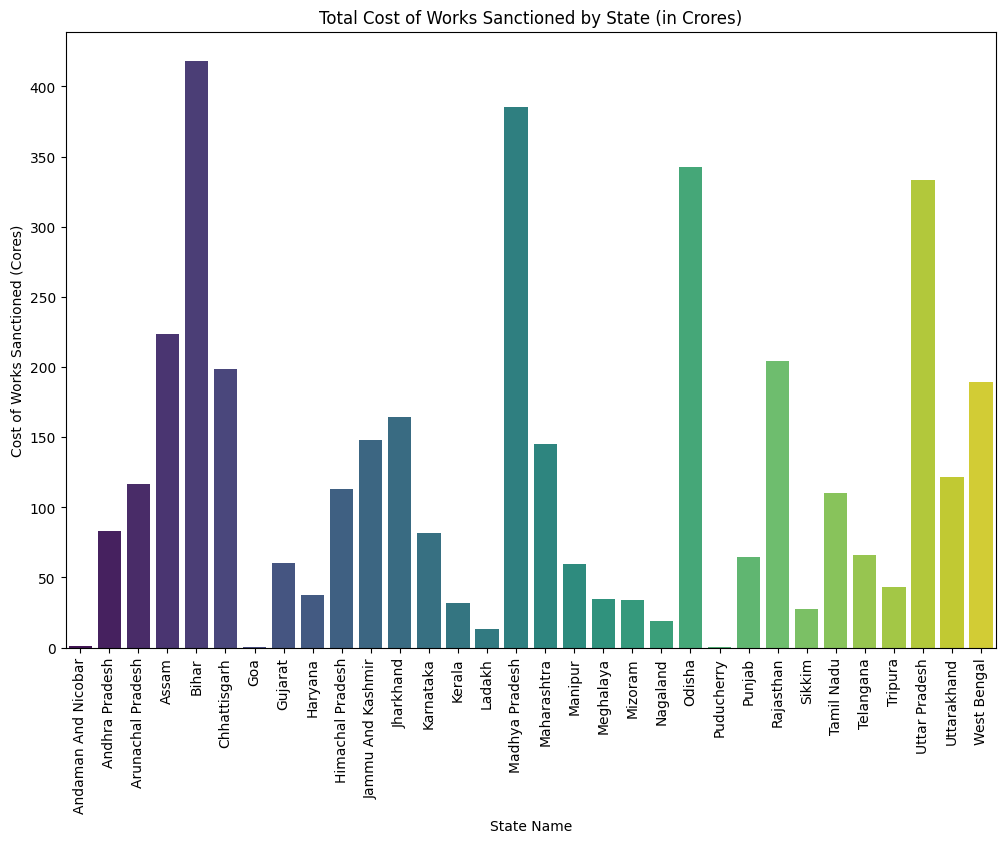

In [63]:
# Plot the cost of works sanctioned by state
plt.figure(figsize=(12, 8))
sns.barplot(x=cost_sanctioned_by_state.index, y=cost_sanctioned_by_state.values/100, palette='viridis')
plt.title('Total Cost of Works Sanctioned by State (in Crores)')
plt.xlabel('State Name')
plt.ylabel('Cost of Works Sanctioned (Cores)')
plt.xticks(rotation=90)
plt.show()

STATE_NAME
Goa                    100.000000
Haryana                 97.492194
Gujarat                 95.767522
Rajasthan               94.698784
Uttar Pradesh           93.879882
Karnataka               92.848630
Assam                   88.355497
Tamil Nadu              88.001785
Bihar                   86.702348
Madhya Pradesh          84.804003
Punjab                  84.497300
Odisha                  83.548039
Andhra Pradesh          83.177173
Chhattisgarh            81.826957
Maharashtra             78.689934
West Bengal             76.767986
Jammu And Kashmir       76.066664
Telangana               73.664383
Andaman And Nicobar     72.102273
Jharkhand               70.904440
Kerala                  69.895359
Uttarakhand             66.148500
Himachal Pradesh        65.934123
Puducherry              65.732759
Arunachal Pradesh       64.812012
Meghalaya               62.862343
Ladakh                  61.336981
Nagaland                60.839523
Sikkim                  57.434687
Man

<ipython-input-64-3e50aa9058cd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_completion_by_state.index, y=avg_completion_by_state.values, palette='viridis')


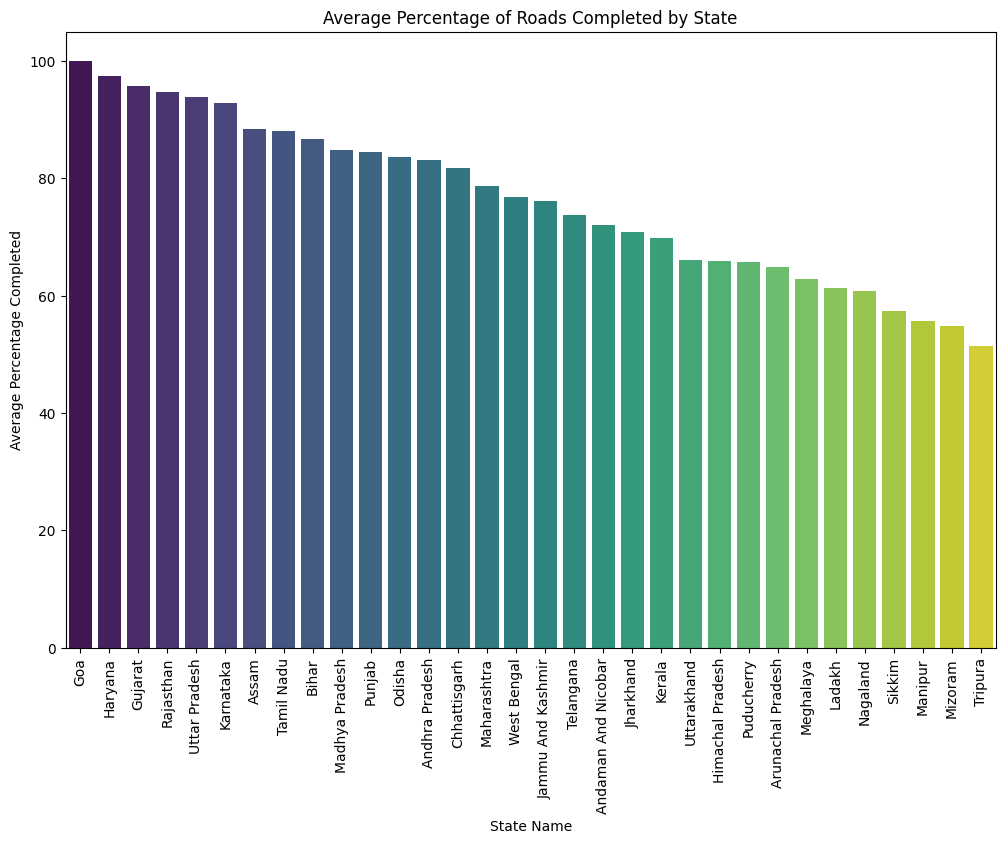

In [64]:
# prompt: do some interesing analysis on df dataframe

# Calculate the percentage of roads completed for each state
df['PERCENTAGE_COMPLETED'] = (df['NO_OF_ROAD_WORKS_COMPLETED'] / df['NO_OF_ROAD_WORK_SANCTIONED']) * 100

# Group by state and calculate the average percentage of roads completed
avg_completion_by_state = df.groupby('STATE_NAME')['PERCENTAGE_COMPLETED'].mean().sort_values(ascending=False)

# Print the result
print(avg_completion_by_state)

# Plot the average percentage of roads completed by state
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_completion_by_state.index, y=avg_completion_by_state.values, palette='viridis')
plt.title('Average Percentage of Roads Completed by State')
plt.xlabel('State Name')
plt.ylabel('Average Percentage Completed')
plt.xticks(rotation=90)
plt.show()




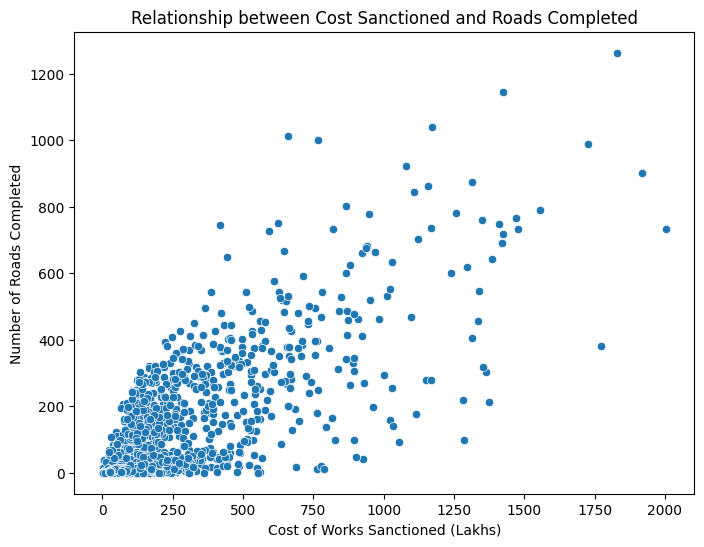

Pearson Correlation Coefficient: 0.7854090561066585
P-value: 0.0
Reject the null hypothesis. There is a significant correlation between cost sanctioned and roads completed.


In [65]:
# Analyze the relationship between cost sanctioned and roads completed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='COST_OF_WORKS_SANCTIONED_LAKHS', y='NO_OF_ROAD_WORKS_COMPLETED', data=df)
plt.title('Relationship between Cost Sanctioned and Roads Completed')
plt.xlabel('Cost of Works Sanctioned (Lakhs)')
plt.ylabel('Number of Roads Completed')
plt.show()

# Calculate the correlation between cost sanctioned and roads completed
correlation = df['COST_OF_WORKS_SANCTIONED_LAKHS'].corr(df['NO_OF_ROAD_WORKS_COMPLETED'])


# Hypothesis testing:
# Null Hypothesis: There is no significant correlation between cost sanctioned and roads completed.
# Alternative Hypothesis: There is a significant positive correlation between cost sanctioned and roads completed.

# Test: Pearson correlation test
# Significance level: 0.05

from scipy.stats import pearsonr

corr, p_value = pearsonr(df['COST_OF_WORKS_SANCTIONED_LAKHS'], df['NO_OF_ROAD_WORKS_COMPLETED'])
print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. There is a significant correlation between cost sanctioned and roads completed.")
else:
  print("Fail to reject the null hypothesis. There is no significant correlation between cost sanctioned and roads completed.")

# Null Hypothesis (H₀): There is no significant difference in the cost of works sanctioned between South Indian states and other states.

# Alternative Hypothesis (H₁): There is a significant difference in the cost of works sanctioned between South Indian states and other states.

In [66]:
# Define South Indian states
south_indian_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']

# Filter the dataframe for South Indian states
south_indian_df = df[df['STATE_NAME'].isin(south_indian_states)]

# Calculate the total cost of works sanctioned for South Indian states
total_cost_south_india = south_indian_df['COST_OF_WORKS_SANCTIONED_LAKHS'].sum()

# Calculate the total cost of works sanctioned for all states
total_cost_all_states = df['COST_OF_WORKS_SANCTIONED_LAKHS'].sum()

# Calculate the proportion of cost allocated to South Indian states
proportion_south_india = total_cost_south_india / total_cost_all_states

print(f"Total cost of works sanctioned for South Indian states: {total_cost_south_india}")
print(f"Total cost of works sanctioned for all states: {total_cost_all_states}")
print(f"Proportion of cost allocated to South Indian states: {proportion_south_india:.2f}")


Total cost of works sanctioned for South Indian states: 37239.65851
Total cost of works sanctioned for all states: 387185.85059000005
Proportion of cost allocated to South Indian states: 0.10


In [67]:
# Separate data into South Indian states and other states
south_indian_df = df[df['STATE_NAME'].isin(south_indian_states)]
other_states_df = df[~df['STATE_NAME'].isin(south_indian_states)]


In [68]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(
    south_indian_df['COST_OF_WORKS_SANCTIONED_LAKHS'].dropna(),
    other_states_df['COST_OF_WORKS_SANCTIONED_LAKHS'].dropna()
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the allocation of cost of works sanctioned between South Indian states and other states.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the allocation of cost of works sanctioned between South Indian states and other states.")


T-statistic: -8.57488291102194
P-value: 1.82017717662752e-17
Reject the null hypothesis. There is a significant difference in the allocation of cost of works sanctioned between South Indian states and other states.
